count    25536.000000
mean        41.071495
std        196.223231
min          0.000000
25%          0.300000
50%          2.900000
75%         23.000000
max       7205.300000
Name: population, dtype: float64


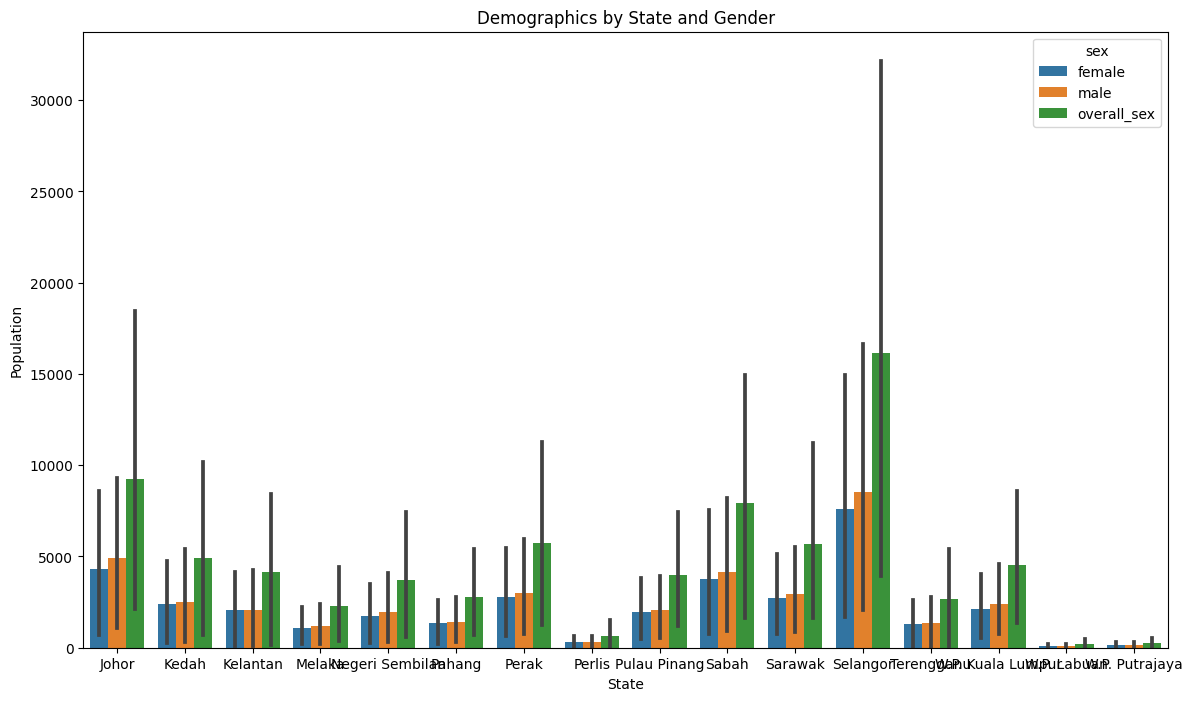

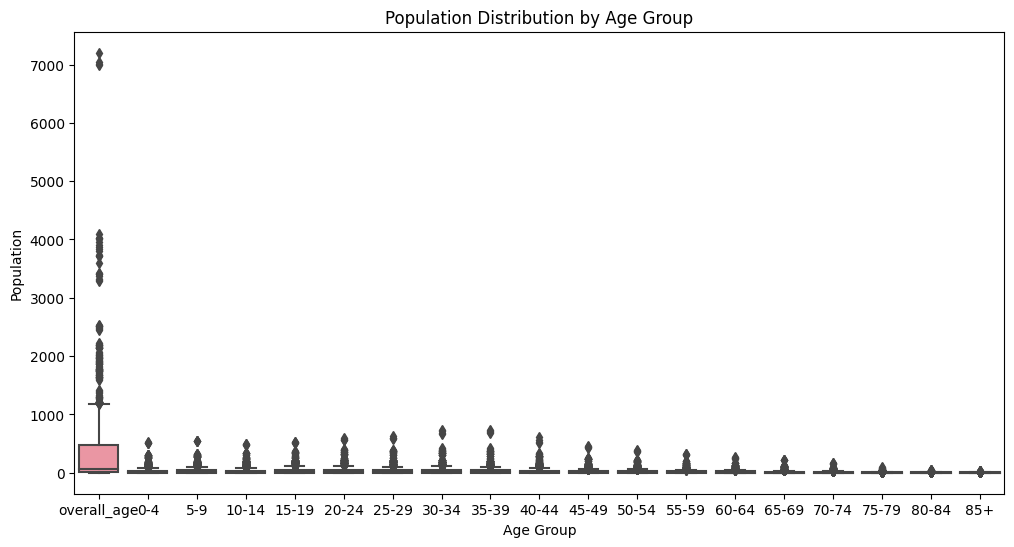

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # Add this line
import seaborn as sns

# Load the dataset
df = pd.read_csv('population_state.csv')

# Display basic statistics for the 'population' column
population_stats = df['population'].describe()
print(population_stats)

# Group by state, sex, and ethnicity
state_demographics = df.groupby(['state', 'sex', 'ethnicity'])['population'].sum().reset_index()

# Visualize demographics by state
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='population', hue='sex', data=state_demographics)
plt.title('Demographics by State and Gender')
plt.xlabel('State')
plt.ylabel('Population')
plt.show()

# Plot population distribution by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='population', data=df)
plt.title('Population Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.show()


Mean Squared Error on Test Set: 118907.9744


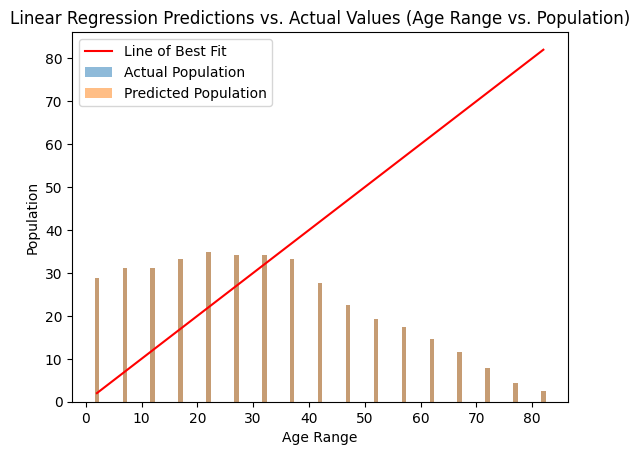

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('population_state.csv')

# Assuming 'date' is not a relevant feature for linear regression, let's exclude it
X = df[['state', 'sex', 'ethnicity', 'age']]
y = df['population']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Add a column of ones for the intercept term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

# Linear regression using matrices
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train.values

# Predictions on the test set
X_test_augmented = np.column_stack((np.ones(X_test.shape[0]), X_test))
predictions = X_test_augmented @ theta

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Create age ranges from 'age' column
df[['age_lower', 'age_upper']] = df['age'].str.extract('(\d+)-(\d+)').astype(float)

# Calculate mean age range
df['age_range'] = df[['age_lower', 'age_upper']].mean(axis=1)

# Group by age range and calculate mean population and mean predictions
grouped_data = df.groupby('age_range').agg({'population': 'mean', 'age_range': 'first'})
grouped_data['predicted_population'] = df.groupby('age_range')['population'].mean()

# Visualize predictions vs. actual values using bar chart and line of best fit
plt.bar(grouped_data['age_range'], grouped_data['population'], label='Actual Population', alpha=0.5)
plt.bar(grouped_data['age_range'], grouped_data['predicted_population'], label='Predicted Population', alpha=0.5)
plt.xlabel('Age Range')
plt.ylabel('Population')
plt.title('Linear Regression Predictions vs. Actual Values (Age Range vs. Population)')

# Adding a line of best fit
x_line = np.linspace(min(grouped_data['age_range']), max(grouped_data['age_range']), 100)
y_line = x_line
plt.plot(x_line, y_line, color='red', label='Line of Best Fit')

plt.legend()
plt.show()


Missing values in the dataset:
 age_range     2688
population       0
dtype: int64
160/160 [==============================] - 0s 1ms/step
Mean Squared Error on Test Set: 29392.4933


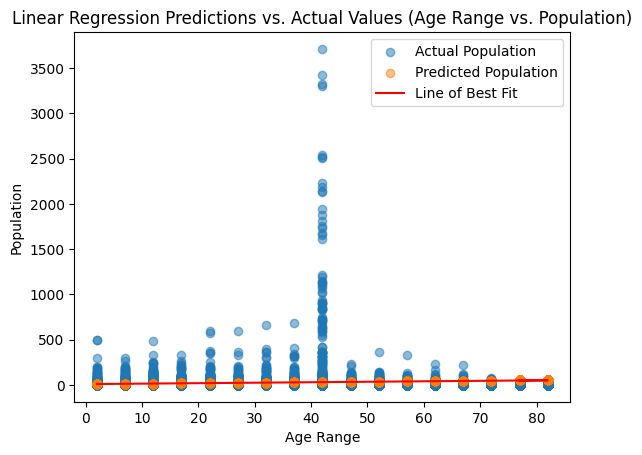

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

# Load the dataset
df = pd.read_csv('population_state.csv')

# Create age ranges from 'age' column
df[['age_lower', 'age_upper']] = df['age'].str.extract('(\d+)-(\d+)').astype(float)

# Calculate mean age range
df['age_range'] = df[['age_lower', 'age_upper']].mean(axis=1)

# Extract age_range and population columns
data = df[['age_range', 'population']].copy()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

# Handle missing values (replace NaN with the mean, median, or other strategies)
data.fillna(data.mean(), inplace=True)

# Convert the DataFrame to numpy arrays
X = data['age_range'].values.reshape(-1, 1)
y = data['population'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
predictions = model.predict(X_test).flatten()

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Visualize predictions vs. actual values with a red line of best fit
plt.scatter(X_test, y_test, label='Actual Population', alpha=0.5)
plt.scatter(X_test, predictions, label='Predicted Population', alpha=0.5)
plt.plot(X_test, predictions, color='red', label='Line of Best Fit')
plt.xlabel('Age Range')
plt.ylabel('Population')
plt.title('Linear Regression Predictions vs. Actual Values (Age Range vs. Population)')
plt.legend()
plt.show()


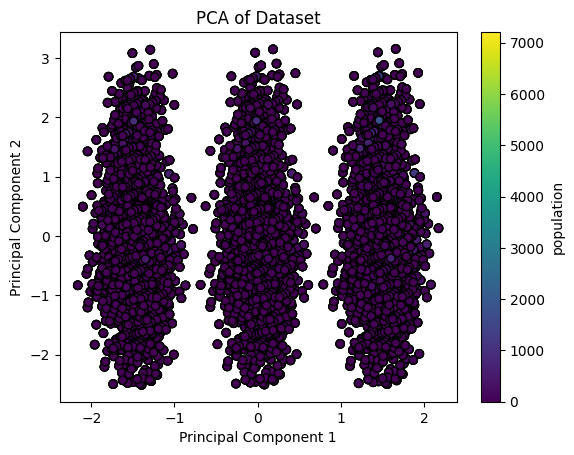

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Assuming you have a function to load the dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

def preprocess_and_visualize_data(df, features, target):

    # Extract features and target
    X = df[features]
    Y = df[target].values

    # One-hot encode categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Set sparse_output to False
    X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))

    # Concatenate encoded features with the numerical ones
    X_processed = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_processed)

    # Apply PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Visualize data
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k')
    plt.title('PCA of Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label=target)
    plt.show()

    return pca, X_scaled

# Example usage:
file_path = 'population_state.csv'
df = load_dataset(file_path)

# Specify features and target variable
features = ['state', 'sex', 'ethnicity', 'age']
target = 'population'

pca, X_scaled = preprocess_and_visualize_data(df, features, target)


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('population_state.csv')

# Define the functions for mean squared error and computing coefficients
def calculate_mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

def compute_coefficients(X, y):
    X_transpose = np.transpose(X)
    X_transpose_X_inv = np.linalg.inv(np.dot(X_transpose, X))
    coefficients = np.dot(np.dot(X_transpose_X_inv, X_transpose), y)
    return coefficients

# Preprocess the data
# For simplicity, let's assume 'date' is not used as a feature, and we focus on other columns
features = ['state', 'sex', 'ethnicity', 'age']
target = 'population'

X_raw = df[features].values
y_true = df[target].values

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(df[features], drop_first=True).values

# Augment the feature matrix with a column of ones for the intercept term
X_augmented = np.column_stack((np.ones_like(X_encoded[:, 0]), X_encoded))

# 1. Calculate Mean Squared Error
# Replace y_pred with your predicted values
y_pred = np.random.rand(len(y_true))  # Replace this line with your prediction
mse = calculate_mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

# 2. Compute Coefficients (Weights)
coefficients = compute_coefficients(X_augmented, y_true)
print("Coefficients (Weights):", coefficients)


Mean Squared Error: 40148.324722110854
Coefficients (Weights): [ 6.21530876e+03 -2.73136321e+02 -4.51866321e+02 -8.85786321e+02
 -5.64289655e+02 -7.79462988e+02 -8.20546548e+01 -1.27027465e+03
 -4.91897988e+02  4.20965345e+02 -1.03972988e+02  2.34435868e+03
 -7.95457988e+02 -3.70159655e+02 -1.37265465e+03 -1.36296799e+03
 -2.97335871e+02  3.61745475e+03 -1.50418408e+03 -7.08070014e+02
 -1.92793564e+03 -2.37281064e+03 -1.75842783e+03  5.76578311e+03
 -8.02975827e+01 -3.31350827e+01 -8.24145202e-01 -1.39132077e+01
 -1.33866452e+01 -3.65210202e+01 -1.51644458e+02 -2.60317895e+02
 -7.93553952e+01 -3.26449145e+02 -3.67769458e+02 -4.26494458e+02
 -4.92041333e+02 -5.67886645e+02 -6.41025708e+02 -6.82830395e+02
 -6.98589770e+02  7.46085085e+03]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load and Preprocess the Data
data = pd.read_csv("population_state.csv")

# Assuming "date" is in the first column, "state" in the second column, "sex" in the third column,
# "ethnicity" in the fourth column, "age" in the fifth column, and "population" in the sixth column
X = data[["date", "state", "sex", "ethnicity", "age"]]
y = data["population"]

# Remove rows where 'age' is 'overall_age'
mask = X["age"] != "overall_age"
X = X[mask]
y = y[mask]

# Convert the "date" column to datetime format
X["date"] = pd.to_datetime(X["date"])

# Extract features from the date (e.g., day of the week, month, year)
X["day_of_week"] = X["date"].dt.dayofweek
X["month"] = X["date"].dt.month
X["year"] = X["date"].dt.year

# Drop the original "date" column and other non-numeric columns
X = X.drop(["date", "state", "sex", "ethnicity"], axis=1)

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=["age"], drop_first=True)

# Print unique values in the "age" column
print("Unique values in the 'age' column:", X.columns)

# Print the number of samples after removing 'overall_age'
print("Number of samples after removing 'overall_age':", len(X))

# Check if there are enough samples for splitting
if len(X) > 0:
    # Step 2: Data Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the number of samples in the training and testing sets
    print("Number of samples in the training set:", len(X_train))
    print("Number of samples in the testing set:", len(X_test))

    # Check if there are enough samples for training and testing
    if len(X_train) > 0 and len(X_test) > 0:
        # Step 3: Training
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Step 4: Prediction
        y_pred = model.predict(X_test)

        # Step 5: Evaluation (Optional)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse}")
    else:
        print("Not enough samples for training/testing.")
else:
    print("Not enough samples for splitting.")


Unique values in the 'age' column: Index(['day_of_week', 'month', 'year', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_5-9', 'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69',
       'age_70-74', 'age_75-79', 'age_80-84', 'age_85+'],
      dtype='object')
Number of samples after removing 'overall_age': 24192
Number of samples in the training set: 19353
Number of samples in the testing set: 4839
Mean Squared Error: 2329.23331307982


Mean Squared Error: 25896.846791870285


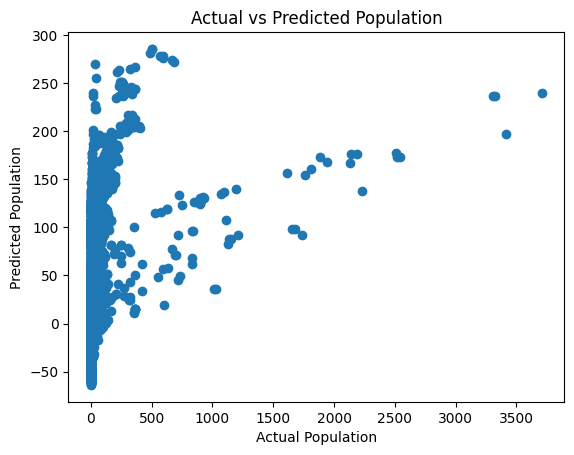

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('population_state.csv')

# Data Preprocessing
df['date'] = pd.to_datetime(df['date'])

# Assuming 'state', 'sex', 'ethnicity' are categorical columns
df = pd.get_dummies(df, columns=['state', 'sex', 'ethnicity'], prefix=['state', 'sex', 'ethnicity'])

# Feature Engineering (Example: extracting month and year from the date)
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Drop unnecessary columns
df = df.drop(['date'], axis=1)

# Handle non-numeric values in 'age' column
df[['age_lower', 'age_upper']] = df['age'].str.extract('(\d+)-(\d+)')
df['age'] = df[['age_lower', 'age_upper']].astype(float).mean(axis=1)
df['age'].fillna(df['age'].median(), inplace=True)

# Define features (X) and target variable (y)
X = df.drop(['population'], axis=1)
y = df['population']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in case there are any
imputer = SimpleImputer(strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Model Selection and Training (Linear Regression as an example)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Comparison - Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Actual vs Predicted Population')
plt.show()
